In [29]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing

In [66]:
data = pd.read_csv(r'E:/RGU_PhD/SINCONF/IoT Network Intrusion Dataset.csv')
data.head(5)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [67]:
df_new =data
df_new.head(2)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding


In [68]:
df_new= df_new.drop(['Cat','Sub_Cat'],axis=1)

In [69]:
from sklearn.preprocessing import LabelEncoder
cat_feature = df_new.select_dtypes(include=['category', object]).columns
df_new[cat_feature] = df_new[cat_feature].apply(LabelEncoder().fit_transform)
df_new.head(3)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,12446,25883,10000,203,10101,17,3496,75,1,1,...,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,0
1,22760,34617,2179,200,554,6,3664,5310,1,2,...,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,0
2,12691,25886,52727,200,9020,6,2082,141,0,3,...,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,0


In [70]:
df_new = df_new.replace([np.inf, -np.inf], np.nan).dropna()
df_new.head(3)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,12446,25883,10000,203,10101,17,3496,75,1,1,...,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,0
1,22760,34617,2179,200,554,6,3664,5310,1,2,...,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,0
2,12691,25886,52727,200,9020,6,2082,141,0,3,...,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,0


In [71]:
df_new.shape

(625415, 84)

In [72]:
df_new = df_new.drop(['Flow_Duration', 'Fwd_IAT_Std', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'Fwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Mean', 'Pkt_Size_Avg', 'Fwd_IAT_Tot', 'Fwd_IAT_Std', 'Fwd_IAT_Std', 'Bwd_IAT_Tot', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_PSH_Flags', 'Bwd_Header_Len', 'Pkt_Len_Std', 'Pkt_Size_Avg', 'Subflow_Fwd_Pkts', 'Active_Std', 'Idle_Mean' ],axis=1)

In [73]:
df_new.shape

(625415, 66)

In [74]:
from sklearn.model_selection import train_test_split
y = df_new.Label
X = df_new.drop(['Label'],axis=1)

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
dt.score(X_test,y_test)

0.9999147235176549

In [79]:
y_pred = dt.predict(X_test)


In [80]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[175590      4]
 [    12  12019]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    175594
           1       1.00      1.00      1.00     12031

    accuracy                           1.00    187625
   macro avg       1.00      1.00      1.00    187625
weighted avg       1.00      1.00      1.00    187625



In [81]:
from sklearn.metrics import confusion_matrix


In [82]:
cf_matrix= confusion_matrix(y_test, y_pred)
cf_matrix

array([[175590,      4],
       [    12,  12019]], dtype=int64)

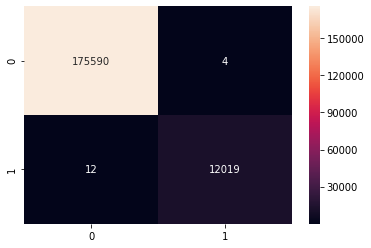

In [83]:
import seaborn as sns
# group_names = ['True Neg','False Pos','False Neg','True Pos']
# group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
# labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
# labels = np.asarray(labels).reshape(2,2)
import matplotlib.pyplot as plt

sns.heatmap(cf_matrix, annot=True, fmt='')
plt.savefig("plots_IoTID20.pdf")
